# Project AI

Import required sources.

In [1]:
%pylab inline
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch import nn, optim
from VAE import *
from train import *
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Run Gaussian model

In [2]:
# set hyperparameters
latent_dim = 2
batch_size = 50
epochs = 2

# Load data
train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, shuffle=True, **{})

In [3]:
VAE_Gaussian, loss_Gaussian = run_train(latent_dim, epochs, 'Gaussian', train_loader, 1e-3)

Train Epoch: 1 [0/60000 (0%)]	Loss: 550.480652
Train Epoch: 1 [5000/60000 (8%)]	Loss: 190.554001
Train Epoch: 1 [10000/60000 (17%)]	Loss: 178.744354
Train Epoch: 1 [15000/60000 (25%)]	Loss: 171.054047
Train Epoch: 1 [20000/60000 (33%)]	Loss: 162.576706
Train Epoch: 1 [25000/60000 (42%)]	Loss: 170.489883
Train Epoch: 1 [30000/60000 (50%)]	Loss: 176.997208
Train Epoch: 1 [35000/60000 (58%)]	Loss: 157.748962
Train Epoch: 1 [40000/60000 (67%)]	Loss: 160.958206
Train Epoch: 1 [45000/60000 (75%)]	Loss: 175.270920
Train Epoch: 1 [50000/60000 (83%)]	Loss: 178.784805
Train Epoch: 1 [55000/60000 (92%)]	Loss: 161.779922
====> Epoch: 1 Average loss: 176.4485
Train Epoch: 2 [0/60000 (0%)]	Loss: 165.148514
Train Epoch: 2 [5000/60000 (8%)]	Loss: 156.104401
Train Epoch: 2 [10000/60000 (17%)]	Loss: 150.829926
Train Epoch: 2 [15000/60000 (25%)]	Loss: 165.144592
Train Epoch: 2 [20000/60000 (33%)]	Loss: 160.006195
Train Epoch: 2 [25000/60000 (42%)]	Loss: 162.664764
Train Epoch: 2 [30000/60000 (50%)]	Loss:

In [ ]:
# epochs = 100

VAE_logit, loss_logit = run_train(latent_dim, epochs, 'logit', train_loader, 1e-3)

In [ ]:
import random
random.seed(1000)

VAE_logit_rank1, loss_logit_rank1 = run_train(latent_dim, epochs, 'logit', train_loader, 1e-3, True)

In [ ]:
VAE_gumbel, loss_gumbel = run_train(latent_dim, epochs, 'Gumbel', train_loader, 1e-3)

In [ ]:
latent_dim = 3
VAE_logit_sigmoid, loss_logit_sigmoid = run_train(latent_dim, epochs, 'logit-sigmoidal', train_loader, 1e-3)

## Plot of losses

In [ ]:
epoch_space = np.linspace(1,50,50)
plt.plot(epoch_space, loss_Gaussian, label='Gaussian')
plt.plot(epoch_space, loss_logit, label='logit')
# plt.plot(epoch_space, loss_logit_rank1, label='logit rank1')
plt.plot(epoch_space, loss_logit_sigmoid, label='logit sigmoidal')
plt.plot(epoch_space, loss_gumbel, label='concrete')
plt.legend()
plt.show()

## 2-D scatterplot

In [4]:
def find_latent_coordinates(train_loader_scatter_plot, model):
    
    x_coordinates = defaultdict(lambda: [])
    y_coordinates = defaultdict(lambda: [])
    
    for batch_idx, (data, label) in enumerate(train_loader_scatter_plot):
        _, z, _ = model(data)
        index = label.data.cpu().numpy()[0]
        
        x_coordinates[index].append(z.data.cpu().numpy()[0][0])
        y_coordinates[index].append(z.data.cpu().numpy()[0][1])
        
        if batch_idx == 10000:
            break
            
    return x_coordinates, y_coordinates

In [5]:
import collections
from collections import *

# Reconstructed
train_data_scatter_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_scatter_plot = torch.utils.data.DataLoader(train_data_scatter_plot,
                                           batch_size=1, shuffle=False, **{})

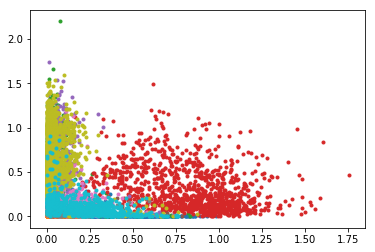

In [10]:
x_latent_space_Gumbel, y_latent_space_Gumbel = find_latent_coordinates(train_loader_scatter_plot, VAE_gumbel)
for label in x_latent_space_Gumbel:
    plt.scatter(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label], marker='.')
plt.show()

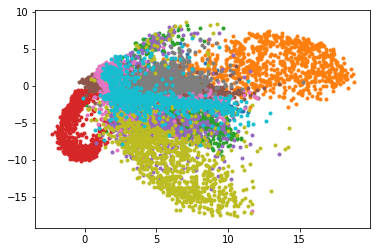

In [6]:
x_latent_space_Gaussian, y_latent_space_Gaussian = find_latent_coordinates(train_loader_scatter_plot, VAE_Gaussian)
for label in x_latent_space_Gaussian:
    plt.scatter(x_latent_space_Gaussian[label], y_latent_space_Gaussian[label], marker='.')
plt.show()

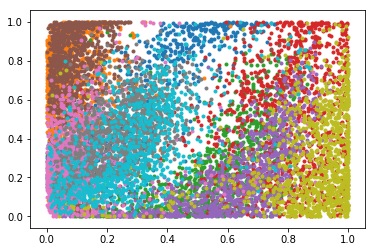

In [25]:
x_latent_space_logit, y_latent_space_logit = find_latent_coordinates(train_loader_scatter_plot, VAE_logit)
for label in x_latent_space_logit:
    plt.scatter(x_latent_space_logit[label], y_latent_space_logit[label], marker='.')
plt.show()

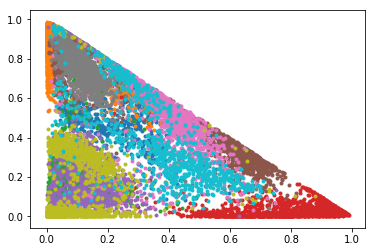

In [16]:
x_latent_space_logit, y_latent_space_logit = find_latent_coordinates(train_loader_scatter_plot, VAE_logit_sigmoid)
for label in x_latent_space_logit:
    plt.scatter(x_latent_space_logit[label], y_latent_space_logit[label], marker='.')
plt.show()

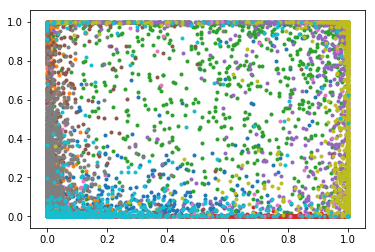

In [6]:
x_latent_space_logit, y_latent_space_logit = find_latent_coordinates(train_loader_scatter_plot, VAE_logit_rank1)
for label in x_latent_space_logit:
    plt.scatter(x_latent_space_logit[label], y_latent_space_logit[label], marker='.')
plt.show()

## 2-D plot of models

In [ ]:
### Let's check if the reconstructions make sense
# Set model to test mode
VAE_MNIST.eval()
    
# Reconstructed
train_data_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_plot = torch.utils.data.DataLoader(train_data_plot,
                                           batch_size=1, shuffle=False, **{})

for batch_idx, (data, _) in enumerate(train_loader_plot):
    x_hat, mu, logvar = VAE_MNIST(data)
    plt.imshow(x_hat.view(1,28,28).squeeze().data.numpy(), cmap='gray')
    plt.title('%i' % train_data.train_labels[batch_idx])
    plt.show()
    if batch_idx == 3:
        break